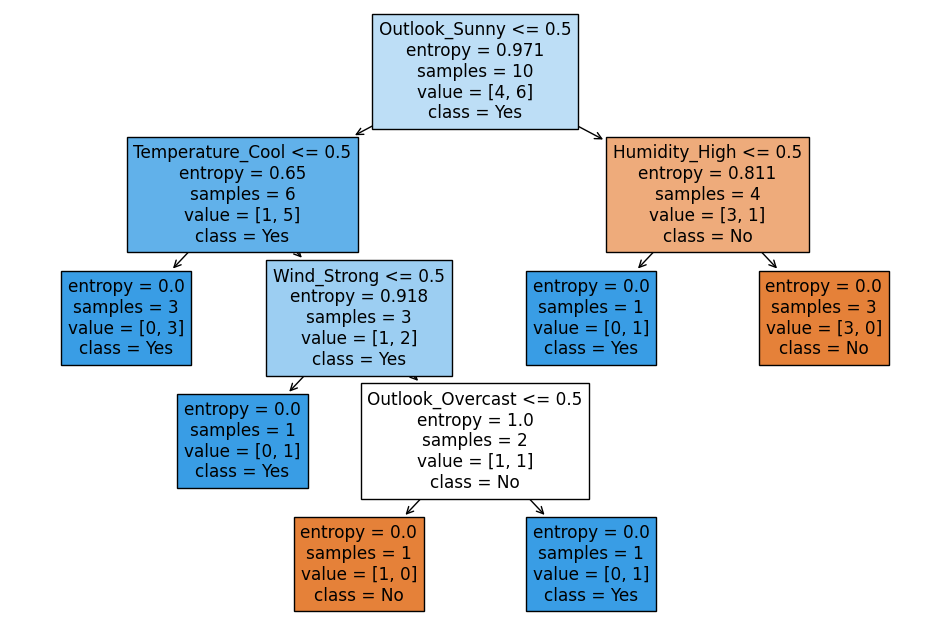

Prediction: Yes


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Create the dataset
df = pd.DataFrame({
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes']
})

# Preprocess categorical features
df_encoded = pd.get_dummies(df.drop(columns='PlayTennis'))

# Initialize and train the decision tree model
model = DecisionTreeClassifier(criterion='entropy')
model.fit(df_encoded, df['PlayTennis'])

# Plot the tree
fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(model, feature_names=df_encoded.columns, class_names=df['PlayTennis'].unique(), filled=True, ax=ax)
plt.show()

# Create the prediction sample with the correct column names
sample = pd.DataFrame([{
    'Outlook_Sunny': 0, 'Outlook_Overcast': 0, 'Outlook_Rain': 1,
    'Temperature_Hot': 0, 'Temperature_Mild': 0, 'Temperature_Cool': 1,
    'Humidity_High': 0, 'Humidity_Normal': 1, 'Wind_Weak': 1, 'Wind_Strong': 0
}], columns=df_encoded.columns)

# Predict for the sample
prediction = model.predict(sample)
print(f"Prediction: {prediction[0]}")
